In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from ast import literal_eval

In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [4]:
import psycopg2

In [5]:
# Establish connection
conn = psycopg2.connect(
    host="localhost",
    database="world",
    user="postgres",
    password="123456"
)

In [6]:
# Create a cursor
cur = conn.cursor()

In [25]:
# Execute query
cur.execute("SELECT * FROM hospital_data")

In [26]:
# Fetch all rows
rows = cur.fetchall()

In [27]:
# Get column names
column_names = [desc[0] for desc in cur.description]

In [28]:
# Create DataFrame
df = pd.DataFrame(rows, columns=column_names)

In [29]:
# df = pd.read_csv("data-17.csv")

In [30]:
df.head()

,Date,aadhar_no,prescription
0,2025-04-06,123456789,"[asd, qwer]"
1,2025-04-06,98765432110,[adf]
2,2025-04-06,1234567892,"[qer, ert]"
3,2025-04-09,98765432110,"[paracetamol, cetaphil]"
4,2025-04-09,98765432110,"[mnbvc, ertrey]"


In [31]:
df.prescription

0                     [asd, qwer]
1                           [adf]
2                      [qer, ert]
3         [paracetamol, cetaphil]
4                 [mnbvc, ertrey]
5     [choti advance, paper boat]
6       [alovera gel, kesh kanti]
7                     [adf, qwer]
8                           [adf]
9                     [qwer, adf]
10        [paracetamol, cetaphil]
11                [mnbvc, ertrey]
12        [cetaphil, paracetamol]
13                    [qwer, adf]
Name: prescription, dtype: object

In [32]:
# Custom function to parse the prescription strings
import re
from typing import List, Union

def parse_prescription(prescription_data: Union[str, List[str]]) -> List[str]:
    """
    Parse prescription data from PostgreSQL into a clean list of items.
    Handles both string representations and direct array returns from psycopg2.
    
    Args:
        prescription_data: Could be either:
            - String representation from CSV (e.g., "{item1,item2}")
            - Direct list return from psycopg2 array_agg or array type
    
    Returns:
        List of cleaned prescription items
    """
    # If it's already a list (direct from psycopg2 array), just clean the items
    if isinstance(prescription_data, list):
        return [item.strip('"\'') for item in prescription_data]
    
    # If it's a string representation (from CSV or text representation)
    if not isinstance(prescription_data, str):
        return []
    
    # Clean the string and handle different formats
    pres_str = prescription_data.strip('{}')
    
    # Handle cases where items might be quoted or contain special characters
    if '"' in pres_str or "'" in pres_str:
        # Handle quoted items with possible commas inside
        items = re.findall(r'"(?:[^"\\]|\\.)*"|\'[^\']*\'|[^,\s]+', pres_str)
    else:
        # Simple comma split when no quotes present
        items = pres_str.split(',')
    
    # Clean each item and filter empty strings
    cleaned_items = [item.strip(' "\'') for item in items if item.strip()]
    
    return cleaned_items

In [33]:
# Apply the parsing function
df['prescription'] = df['prescription'].apply(parse_prescription)

In [34]:
# Explode the prescription lists into individual rows
exploded_df = df.explode('prescription')

In [35]:
# Count prescription frequencies
prescription_counts = exploded_df['prescription'].value_counts()

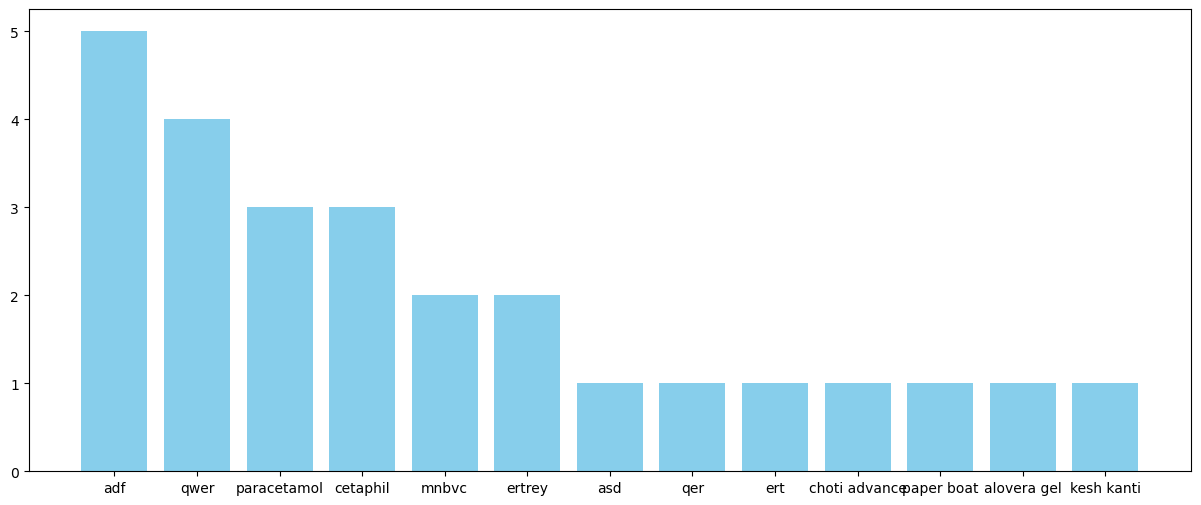

In [41]:
# Create the histogram
#eda
plt.figure(figsize=(15, 6))
bars = plt.bar(prescription_counts.index, prescription_counts.values, color='skyblue')

In [37]:
exploded_df.head()

,Date,aadhar_no,prescription
0,2025-04-06,123456789,asd
0,2025-04-06,123456789,qwer
1,2025-04-06,98765432110,adf
2,2025-04-06,1234567892,qer
2,2025-04-06,1234567892,ert


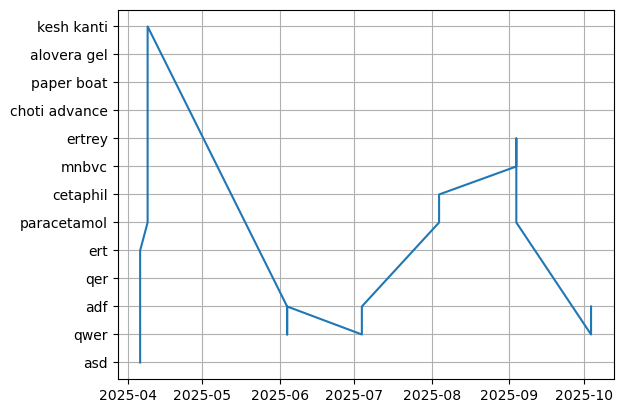

In [40]:
#eda
plt.plot(exploded_df['Date'],exploded_df['prescription'])
plt.grid(True)
plt.show()

In [39]:
!jupyter nbconvert --to html analysis.ipynb

[NbConvertApp] Converting notebook analysis.ipynb to html
[NbConvertApp] Writing 664570 bytes to analysis.html
